<a href="https://colab.research.google.com/github/revanth8607/COURSE/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/titanic dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**Data Cleaning**

##deleting columns which doesnt effect the survivability of a person

In [5]:
del data['Name']

In [6]:
del data['Ticket']

In [7]:
del data['Fare']

In [8]:
del data['Cabin']

In [9]:
# chnaging "males" to '1' and "females" to 2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
data["Gender"]=data["Sex"].apply(getNumber)
#We have created a new column called "Gender" and
#filling it with values 1,2 based on the values of sex column
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [10]:
del data['Sex']

In [11]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [13]:
mean= data[data.Survived==1].Age.mean()
mean

28.343689655172415

In [14]:
data["age"]=np.where(pd.isnull(data.Age) & data["Survived"]==1  ,mean, data["Age"])
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [16]:
meanNS=data[data.Survived==0].Age.mean()
meanNS

30.62617924528302

In [17]:
data.age.fillna(meanNS,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [19]:
del data['Age']
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [20]:
# Finding the number of people who have survived
# given that they have embarked or boarded from a particular port

survivedQ = data[data.Embarked == 'Q'][data.Survived == 1].shape[0]
survivedC = data[data.Embarked == 'C'][data.Survived == 1].shape[0]
survivedS = data[data.Embarked == 'S'][data.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


<ipython-input-20-e48ffc1fb9ce>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = data[data.Embarked == 'Q'][data.Survived == 1].shape[0]
<ipython-input-20-e48ffc1fb9ce>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = data[data.Embarked == 'C'][data.Survived == 1].shape[0]
<ipython-input-20-e48ffc1fb9ce>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = data[data.Embarked == 'S'][data.Survived == 1].shape[0]


In [22]:
survivedQ = data[data.Embarked == 'Q'][data.Survived == 0].shape[0]
survivedC = data[data.Embarked == 'C'][data.Survived == 0].shape[0]
survivedS = data[data.Embarked == 'S'][data.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


<ipython-input-22-64baac18f253>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = data[data.Embarked == 'Q'][data.Survived == 0].shape[0]
<ipython-input-22-64baac18f253>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = data[data.Embarked == 'C'][data.Survived == 0].shape[0]
<ipython-input-22-64baac18f253>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = data[data.Embarked == 'S'][data.Survived == 0].shape[0]


In [23]:
data.dropna(inplace=True)
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [24]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [25]:
#Renaming "age" and "gender" columns
data.rename(columns={'age':'Age'}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [26]:
data.rename(columns={'Gender':'Sex'}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [27]:
def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
data["Embark"]=data["Embarked"].apply(getEmb)
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [28]:
del data['Embarked']
data.rename(columns={'Embark':'Embarked'}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


577
312


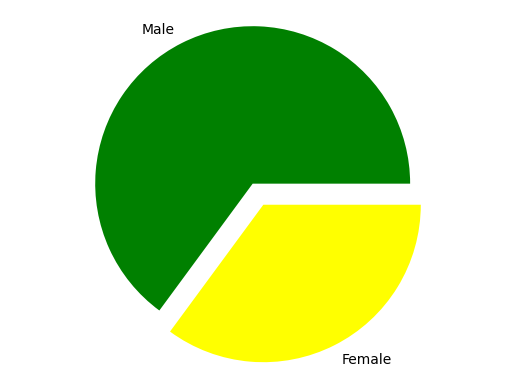

In [30]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (data['Sex'] == 1).sum()
#Summing up all the values of column gender with a
#condition for male and similary for females
females = (data['Sex'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal')
plt.show()

In [31]:
MaleS=data[data.Sex==1][data.Survived==1].shape[0]
print(MaleS)
MaleN=data[data.Sex==1][data.Survived==0].shape[0]
print(MaleN)
FemaleS=data[data.Sex==2][data.Survived==1].shape[0]
print(FemaleS)
FemaleN=data[data.Sex==2][data.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


<ipython-input-31-efc7fac35d5b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=data[data.Sex==1][data.Survived==1].shape[0]
<ipython-input-31-efc7fac35d5b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=data[data.Sex==1][data.Survived==0].shape[0]
<ipython-input-31-efc7fac35d5b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=data[data.Sex==2][data.Survived==1].shape[0]
<ipython-input-31-efc7fac35d5b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=data[data.Sex==2][data.Survived==0].shape[0]


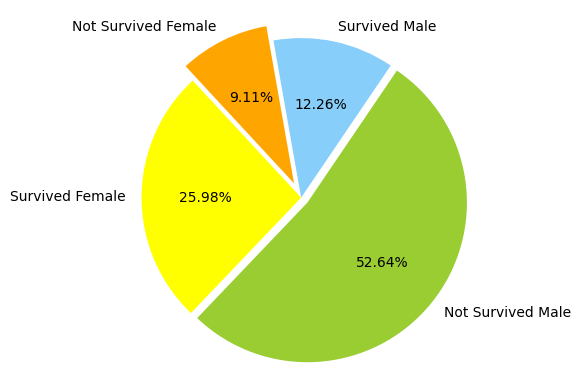

In [32]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()